In [17]:
from SimPEG import EM, Survey
from SimPEG import Mesh, Utils
import numpy as np
import matplotlib.pyplot as plt
from pymatsolver import PardisoSolver
%pylab inline
cs = 40.
npad = 10
hx = [(cs, npad, -1.3), (cs, 21), (cs, npad, 1.3)]
hy = [(cs, npad, -1.3), (cs, 21), (cs, npad, 1.3)]
hz = [(cs, npad, -1.3), (cs, 20), (cs, npad, 1.3)]
mesh = Mesh.TensorMesh([hx, hy, hz], x0="CCC")
sigma = np.ones(mesh.nC)*1e-2
sigma[mesh.gridCC[:,2] > 0.] = 1e-2

x = mesh.vectorCCx[(mesh.vectorCCx > -155.) & (mesh.vectorCCx < 155.)]
y = mesh.vectorCCx[(mesh.vectorCCy > -155.) & (mesh.vectorCCy < 155.)]

Aloc = np.r_[-20., 0., 0.]
Bloc = np.r_[20., 0., 0.]
# M = Utils.ndgrid(x-25., y, np.r_[0.])
# N = Utils.ndgrid(x+25., y, np.r_[0.])
# rxloc = Utils.ndgrid(x, y, np.r_[0.])
rxloc = np.r_[-200., 0., 0.].reshape([1, -1])
srcloc = np.vstack((Aloc, Bloc))

Populating the interactive namespace from numpy and matplotlib


In [18]:
tmax = 1e-2
tmin = 1e-4
print 1200*np.sqrt(100*tmin) / 3.
print 1200*np.sqrt(100*tmax) 
print mesh.hx[:10].sum()

40.0
1200.0
2216.21385872


In [19]:
times = np.logspace(-4, -3, 21)
rx = EM.TDEM.Rx.Point_e(rxloc, times, orientation='x')
src = EM.TDEM.Src.LineCurrent([rx], loc=srcloc, waveform = EM.TDEM.Src.StepOffWaveform())
prb = EM.TDEM.Problem3D_e(mesh, sigma = sigma, verbose=True)
prb.Solver = PardisoSolver
prb.solverOpts = {"is_symmetric":False}
# prb.timeSteps = [(1e-4, 10), (5e-4, 10), (1e-3, 10)]
prb.timeSteps = [(1e-5, 10), (1e-4, 10)]

In [20]:
survey = EM.TDEM.Survey([src])
survey.pair(prb)

In [21]:
f = prb.fields(sigma)

Calculating Initial fields
Factorize system matrix for DC problem
**************************************************
Calculating fields(m)
**************************************************
Factoring...   (dt = 1.000000e-05)
Done
    Solving...   (tInd = 1)
    Done...
    Solving...   (tInd = 2)
    Done...
    Solving...   (tInd = 3)
    Done...
    Solving...   (tInd = 4)
    Done...
    Solving...   (tInd = 5)
    Done...
    Solving...   (tInd = 6)
    Done...
    Solving...   (tInd = 7)
    Done...
    Solving...   (tInd = 8)
    Done...
    Solving...   (tInd = 9)
    Done...
    Solving...   (tInd = 10)
    Done...
Factoring...   (dt = 1.000000e-04)
Done
    Solving...   (tInd = 11)
    Done...
    Solving...   (tInd = 12)
    Done...
    Solving...   (tInd = 13)
    Done...
    Solving...   (tInd = 14)
    Done...
    Solving...   (tInd = 15)
    Done...
    Solving...   (tInd = 16)
    Done...
    Solving...   (tInd = 17)
    Done...
    Solving...   (tInd = 18)
    Done...
 

In [28]:
dpred = survey.dpred(sigma, f=f)

In [29]:
srcloc[0]

array([-20.,   0.,   0.])

In [30]:
from em_examples import TDEMDipolarfields
anax, anay, anaz = TDEMDipolarfields.E_from_ElectricDipoleWholeSpace(rxloc, np.r_[0, 0, 0], 0.01, rx.times, orientation="X", length=40.)

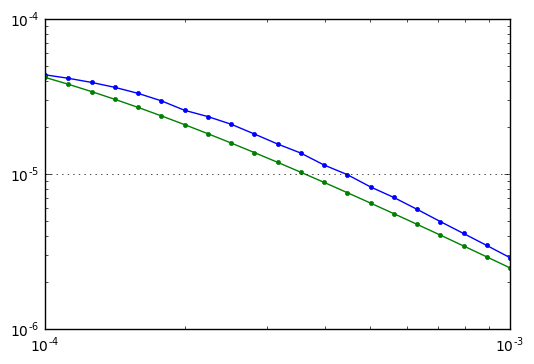

In [25]:
plt.loglog(rx.times, dpred, '.-')
plt.loglog(rx.times, anax, '.-')
plt.grid(True)

In [26]:
# temp = dpred.reshape((rxloc.shape[0], rx.times.size), order="F") [:, 0]
# Utils.plot2Ddata(rxloc[:,:2], temp)

In [27]:
# f[src, 'e', 4]